## Data preparation

In [1]:
import pandas as pd
import numpy as np

In [9]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [10]:
!wget $data

--2021-09-11 14:27:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  1.33MB/s    in 1.1s    

2021-09-11 14:27:34 (1.33 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [11]:
df = pd.read_csv('data.csv')

In [12]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
# MAke all columns string lower and remove spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [15]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [16]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [20]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [21]:
for s in strings:
    df[s] = df[s].str.lower().str.replace(' ', '_')

In [22]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [26]:
for col in df.columns:
    print(f'{col}: \n {df[col].unique()[:5]} \n number of unique values: {df[col].nunique()}')

make: 
 ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] 
 number of unique values: 48
model: 
 ['1_series_m' '1_series' '100' '124_spider' '190-class'] 
 number of unique values: 914
year: 
 [2011 2012 2013 1992 1993] 
 number of unique values: 28
engine_fuel_type: 
 ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] 
 number of unique values: 10
engine_hp: 
 [335. 300. 230. 320. 172.] 
 number of unique values: 356
engine_cylinders: 
 [ 6.  4.  5.  8. 12.] 
 number of unique values: 9
transmission_type: 
 ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] 
 number of unique values: 5
driven_wheels: 
 ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] 
 number of unique values: 4
number_of_doors: 
 [ 2.  4.  3. nan] 
 number of unique values: 3
market_category: 
 ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'

### Distribution of the price

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

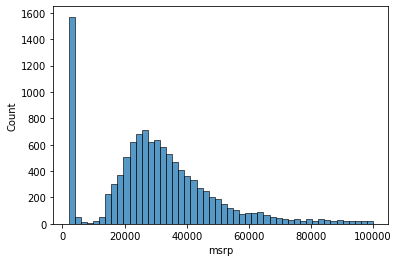

In [30]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [34]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

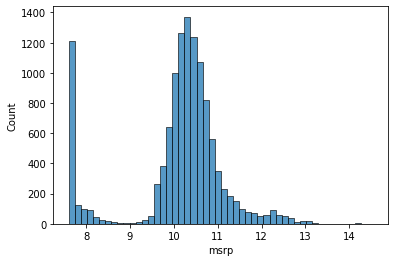

In [36]:
sns.histplot(price_logs, bins=50)

### Missing values

In [38]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting of the validation framework

In [74]:
from sklearn.model_selection import train_test_split

In [96]:
TRAIN_SIZE = .6
# Split the train set from the rest
X_train,  X_, y_train, y_ = train_test_split(df[df.columns[:-1]], df['msrp'], train_size=TRAIN_SIZE)

In [97]:
# SPlit the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=.5)

In [98]:
X_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
5656,volkswagen,gti,2013,premium_unleaded_(recommended),200.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,33,24,873
6477,lexus,ls_430,2005,premium_unleaded_(required),290.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,23,16,454
2429,toyota,celica,2003,premium_unleaded_(required),180.0,4.0,automatic,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,27,20,2031
5211,mitsubishi,galant,2010,regular_unleaded,160.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,30,21,436
8137,dodge,ram_cargo,2003,regular_unleaded,175.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,15,13,1851


In [99]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [100]:
type(y_train)

pandas.core.series.Series

In [101]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

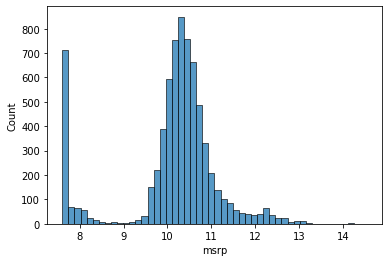

In [102]:
sns.histplot(y_train, bins=50)

## Linear Regression

In [73]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.91328684,
       10.28247178, 10.45380308])